In This Project we predict the price of the airplane using regression technique,
and which factor affects the price of the arplane we try to find from the below dataset which i have got from the internet.

In [1]:
import pandas as pd
import numpy as np

In [2]:
bud=pd.read_csv("C:\\Users\\ACER\\Documents\\Zoom\\business.csv")

In [3]:
bud

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585"


In [4]:
bud.dtypes

date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
dtype: object

In [5]:
bud["stop"].value_counts()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                   81489
non-stop                                                                      8102
2+-stop                                                                       1083
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t              810
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t              776
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t              257
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t            242
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t              152
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t               93
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t               86
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t       75
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t         71
1-st

In [6]:
import re
bud["stop"]=bud["stop"].str.replace("\n"," ")
bud["stop"]=bud["stop"].str.replace("\t"," ")

In [7]:
bud["stop"].value_counts()

1-stop                                             81489
non-stop                                            8102
2+-stop                                             1083
1-stop             Via IDR                           810
1-stop             Via IXU                           776
1-stop             Via PAT                           257
1-stop             Via Patna                         242
1-stop             Via BBI                           152
1-stop             Via STV                            93
1-stop             Via IXE                            86
1-stop             Via Bhubaneswar                    75
1-stop             Via Hyderabad                      71
1-stop             Via Delhi                          59
1-stop             Via Raipur                         43
1-stop             Via Chennai                        42
1-stop             Via Guwahati                       29
1-stop             Via VTZ                            17
1-stop             Via NDC     

In [107]:

#bud["stop"][bud["stop"].str.contains("1-stop")] = "1-stop"

C:\Users\ACER\AppData\Local\Temp\ipykernel_1804\845049112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bud["stop"][bud["stop"].str.contains("1-stop")] = "1-stop"


In [108]:
#bud["stop"].value_counts()

1-stop       84302
non-stop      8102
2+-stop       1083
Name: stop, dtype: int64

In [8]:
#map string values in the total stops column into integer values
'''dic={'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4}

bud['Stops']=df['stops'].map(dic)
bud['Stops'].value_counts()'''
from sklearn.preprocessing import LabelEncoder
bud_stop = LabelEncoder()
bud_stop.fit(bud['stop'])
bud["stop"] = bud_stop.transform(bud['stop'])

In [9]:
bud["stop"].value_counts()

0     81489
24     8102
23     1083
10      810
12      776
16      257
17      242
1       152
20       93
11       86
2        75
9        71
4        59
19       43
3        42
7        29
22       17
15       14
13       14
18       13
14       10
5         3
6         3
21        3
8         1
Name: stop, dtype: int64

In [10]:
bud["airline"].value_counts()

Vistara      60589
Air India    32898
Name: airline, dtype: int64

In [11]:
bud["from"].value_counts()

Mumbai       19858
Delhi        18316
Bangalore    16441
Kolkata      13473
Hyderabad    12870
Chennai      12529
Name: from, dtype: int64

In [12]:
bud["to"].value_counts()

Mumbai       18991
Delhi        16707
Bangalore    16198
Kolkata      14758
Hyderabad    13675
Chennai      13158
Name: to, dtype: int64

In [13]:
bud["ch_code"].value_counts()

UK    60589
AI    32898
Name: ch_code, dtype: int64

In [14]:
bud.duplicated().sum()

0

In [15]:
bud['ch_code']=bud.ch_code.astype('category').cat.codes

In [16]:
bud["ch_code"].value_counts()

1    60589
0    32898
Name: ch_code, dtype: int64

In [17]:
bud['airline'] = bud['airline'].map(dict(zip(['Vistara','Air India'],[0,1])))

In [18]:
bud["airline"].value_counts()

0    60589
1    32898
Name: airline, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
bud_from = LabelEncoder()
bud_from.fit(bud['from'])
bud["from"] = bud_from.transform(bud['from'])

In [20]:
bud["from"].value_counts()

5    19858
2    18316
0    16441
4    13473
3    12870
1    12529
Name: from, dtype: int64

In [21]:
bud_from.fit(bud["to"])

bud['to']=bud_from.transform(bud["to"])

In [22]:
bud['to'].value_counts()

5    18991
2    16707
0    16198
4    14758
3    13675
1    13158
Name: to, dtype: int64

In [23]:
bud['price'] = bud['price'].str.replace(',', '').astype(float)

In [24]:
bud['price']

0        25612.0
1        25612.0
2        42220.0
3        44450.0
4        46690.0
          ...   
93482    69265.0
93483    77105.0
93484    79099.0
93485    81585.0
93486    81585.0
Name: price, Length: 93487, dtype: float64

In [25]:
bud['Duration_hour']=bud['time_taken'].str.split('h').str[0]
bud['Duration_min']=bud['time_taken'].str.split('h').str[1].replace(['m'],'')
#df['Duration_min']=df['Duration_min'].apply(lambda i:i[:-1]) it is not work
bud['Duration_min']=bud['Duration_min'].str[:-1]

In [26]:
# those two rows make an error when I want to convert them to integer so I will drop it 
bud 

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Duration_hour,Duration_min
0,11-02-2022,1,0,868,18:00,2,02h 00m,24,20:00,5,25612.0,02,00
1,11-02-2022,1,0,624,19:00,2,02h 15m,24,21:15,5,25612.0,02,15
2,11-02-2022,1,0,531,20:00,2,24h 45m,0,20:45,5,42220.0,24,45
3,11-02-2022,1,0,839,21:25,2,26h 30m,0,23:55,5,44450.0,26,30
4,11-02-2022,1,0,544,17:15,2,06h 40m,0,23:55,5,46690.0,06,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,0,1,822,09:45,1,10h 05m,0,19:50,3,69265.0,10,05
93483,31-03-2022,0,1,826,12:30,1,10h 25m,0,22:55,3,77105.0,10,25
93484,31-03-2022,0,1,832,07:05,1,13h 50m,0,20:55,3,79099.0,13,50
93485,31-03-2022,0,1,828,07:00,1,10h 00m,0,17:00,3,81585.0,10,00


In [129]:
bud.dtypes

date              object
airline            int64
ch_code             int8
num_code           int64
dep_time          object
from               int32
time_taken        object
stop               int32
arr_time          object
to                 int32
price            float64
Duration_hour     object
Duration_min      object
dtype: object

In [27]:
bud["Duration_hour"]=bud["Duration_hour"].astype(int)


In [28]:
bud["Duration_min"]=bud["Duration_min"].astype(int)

In [29]:
bud.dtypes

date              object
airline            int64
ch_code             int8
num_code           int64
dep_time          object
from               int32
time_taken        object
stop               int32
arr_time          object
to                 int32
price            float64
Duration_hour      int32
Duration_min       int32
dtype: object

In [30]:
def convert_to_minutes(h):
    if h>12:
        return (h-12)*60
    else:
        return h*60
    
bud['Duration_hour']=bud['Duration_hour'].apply(convert_to_minutes)
bud['Duration_min']=bud['Duration_hour']+bud['Duration_min']
bud.drop(columns=['Duration_hour',"time_taken"],inplace=True)
bud.head()

,date,airline,ch_code,num_code,dep_time,from,stop,arr_time,to,price,Duration_min
0,11-02-2022,1,0,868,18:00,2,24,20:00,5,25612.0,120
1,11-02-2022,1,0,624,19:00,2,24,21:15,5,25612.0,135
2,11-02-2022,1,0,531,20:00,2,0,20:45,5,42220.0,765
3,11-02-2022,1,0,839,21:25,2,0,23:55,5,44450.0,870
4,11-02-2022,1,0,544,17:15,2,0,23:55,5,46690.0,400


In [31]:
bud.corr()

C:\Users\ACER\AppData\Local\Temp\ipykernel_4324\3573730486.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bud.corr()


,airline,ch_code,num_code,from,stop,to,price,Duration_min
airline,1.000000,-1.000000,-0.691739,0.045208,0.068555,0.047192,-0.307322,0.010969
ch_code,-1.000000,1.000000,0.691739,-0.045208,-0.068555,-0.047192,0.307322,-0.010969
num_code,-0.691739,0.691739,1.000000,0.115092,-0.072613,-0.133620,0.221424,-0.044031
from,0.045208,-0.045208,0.115092,1.000000,0.051542,-0.232568,0.016159,-0.000665
stop,0.068555,-0.068555,-0.072613,0.051542,1.000000,0.002683,-0.514682,-0.342052
to,0.047192,-0.047192,-0.133620,-0.232568,0.002683,1.000000,0.026977,-0.012072
price,-0.307322,0.307322,0.221424,0.016159,-0.514682,0.026977,1.000000,0.197141
Duration_min,0.010969,-0.010969,-0.044031,-0.000665,-0.342052,-0.012072,0.197141,1.000000


So, in the data we can clearly see the price of airplane was affected by the which type of airplane service we choose and which route that flight travel, number of stops during the travel the flight have and what stop it is, and how many hours it fly to reach the destination [distance].

In [32]:
bud

,date,airline,ch_code,num_code,dep_time,from,stop,arr_time,to,price,Duration_min
0,11-02-2022,1,0,868,18:00,2,24,20:00,5,25612.0,120
1,11-02-2022,1,0,624,19:00,2,24,21:15,5,25612.0,135
2,11-02-2022,1,0,531,20:00,2,0,20:45,5,42220.0,765
3,11-02-2022,1,0,839,21:25,2,0,23:55,5,44450.0,870
4,11-02-2022,1,0,544,17:15,2,0,23:55,5,46690.0,400
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,0,1,822,09:45,1,0,19:50,3,69265.0,605
93483,31-03-2022,0,1,826,12:30,1,0,22:55,3,77105.0,625
93484,31-03-2022,0,1,832,07:05,1,0,20:55,3,79099.0,110
93485,31-03-2022,0,1,828,07:00,1,0,17:00,3,81585.0,600


<AxesSubplot:xlabel='price', ylabel='Count'>

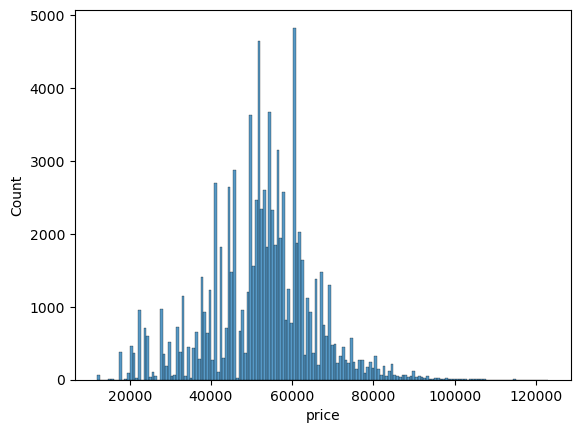

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(bud["price"])

In [46]:
#X=bud[["airline","ch_code","num_code","from","to"]]
#y=bud[["price"]]

<AxesSubplot:>

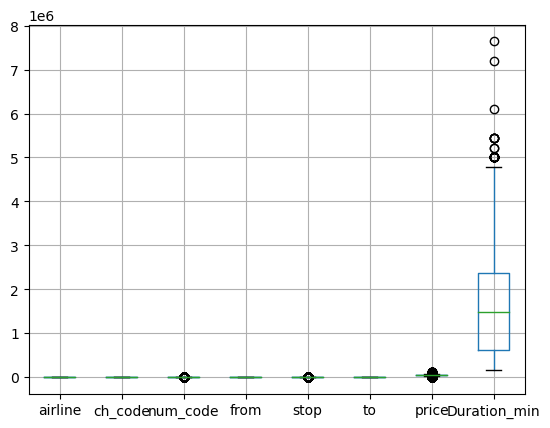

In [75]:
bud.boxplot()

In [63]:
bud.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'stop',
       'arr_time', 'to', 'price', 'Duration_min'],
      dtype='object')

In [45]:
X=bud.drop(columns=['price','date','dep_time','arr_time','from','to'])
y=bud['price']
X.shape,y.shape

((93487, 5), (93487,))

In [46]:
from sklearn.model_selection import train_test_split
X=X.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

In [47]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((65440, 5), (28047, 5), (65440,), (28047,))

In [48]:
X_train

array([[  0,   1, 878,   0, 420],
       [  0,   1, 854,   0, 810],
       [  0,   1, 747,   0, 110],
       ...,
       [  0,   1, 808,   0, 175],
       [  1,   0, 764,   0, 740],
       [  0,   1, 870,   0, 850]], dtype=int64)

In [49]:
y_train

79517    41314.0
53477    44280.0
3861     70793.0
35542    57453.0
70278    39499.0
          ...   
21440    34460.0
73349    17794.0
50057    56588.0
5192     59033.0
77708    58394.0
Name: price, Length: 65440, dtype: float64

In [50]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import cross_val_score


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [51]:
CV = []
train_scores = []
test_scores = []

def pred_model(model):
    # Training model
    model.fit(X_train,y_train.values)
            
    # score of train set
    train_model_score = model.score(X_train,y_train)
    train_scores.append(round(train_model_score,2))
    y_pred_train=model.predict(X_train)
    
    # score of test set
    test_model_score = model.score(X_test,y_test)
    test_scores.append(round(test_model_score,2))
    y_pred_test=model.predict(X_test)
    
    # train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train score :",round(train_model_score,2))
    print("Test score :",round(test_model_score,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    print("Mean absolute error for train :",mean_absolute_error(y_train,y_pred_train))
    print("Median absolute error for train :",median_absolute_error(y_train,y_pred_train))
    print("Mean absolute error for test :",mean_absolute_error(y_test,y_pred_test))
    print("Median absolute error for test :",mean_absolute_error(y_test,y_pred_test))
    
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train[:100]-y_pred_train[:100]),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test[:100], y = y_pred_test[:100])
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train score : 0.34
Test score : 0.34
Train CV scores : [0.33475827 0.34545794 0.34489587 0.32978283 0.34892007]
Train CV mean : 0.34
Mean absolute error for train : 7855.247288872354
Median absolute error for train : 5800.8057371128525
Mean absolute error for test : 7927.396585262081
Median absolute error for test : 7927.396585262081


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


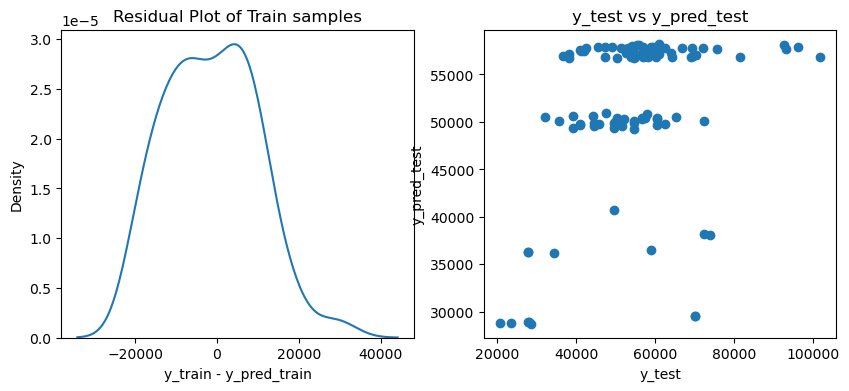

In [52]:
lr = LinearRegression()
pred_model(lr)

Train score : 0.87
Test score : 0.86
Train CV scores : [0.84649144 0.84577292 0.85565328 0.84924805 0.86102411]
Train CV mean : 0.85
Mean absolute error for train : 2616.9781313340586
Median absolute error for train : 1406.2646470183972
Mean absolute error for test : 2747.2058314282885
Median absolute error for test : 2747.2058314282885


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


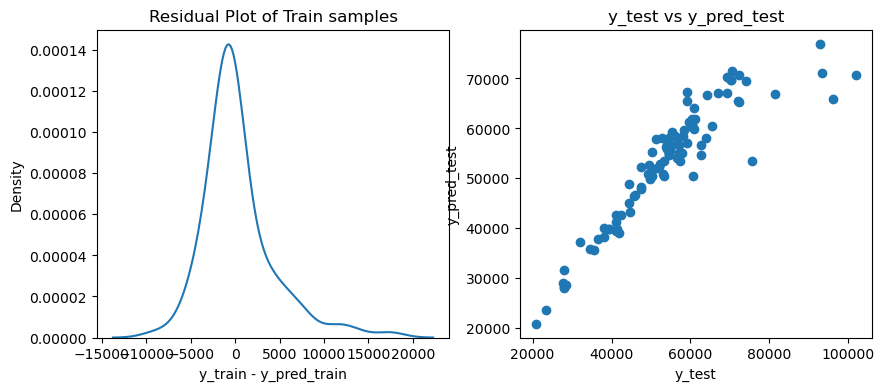

In [53]:
RF = RandomForestRegressor(max_depth=30,min_samples_split=20,n_estimators=100)
pred_model(RF)

In [54]:
predicted_price=RF.predict([[2,1,768,0,120],[2,0,875,0,321],[1,1,689,1,125],[0,0,876,0,156]])  #[airline,ch_code,stop,duration_min]=[price]

In [55]:
predicted_price

array([60998.98085973, 35188.39431598, 53113.9048411 , 41212.12059724])